# Appendix

In [1]:
# pLease install the libraries required using the below requirements file
# !pip install requirements_MLP.txt

In [2]:
# importing libraries
# Code written by Ashwin Ram Kumar

import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error

from sklearn.neural_network import MLPClassifier 


from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

from io import StringIO

import math

import traceback

In [3]:
# Code written by Ashwin Ram Kumar
# convert wildfires.txt to datframe
df = pd.read_csv(StringIO(Path(r'wildfires.txt').read_text()),delimiter='\t')

In [4]:
# display the dataframe 
# Code written by Ashwin Ram Kumar
df


,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...,...
199,yes,2017,31,67,0.0,45.15,17.89,26,9,15
200,no,2017,29,89,4.4,8.74,6.52,27,9,15
201,no,2009,27,88,0.5,8.87,3.71,28,9,30
202,no,2016,25,56,0.1,15.54,6.10,29,9,20


In [5]:
# check if any null exists in any column
# Code written by Ashwin Ram Kumar
df.isna().any()

fire             False
year             False
temp             False
humidity         False
rainfall         False
drought_code     False
buildup_index    False
day              False
month            False
wind_speed       False
dtype: bool

In [6]:
# gain a little understanding of the data and range of each feature
# Code written by Ashwin Ram Kumar
df.describe()

,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,2011.975490,31.906863,62.279412,0.823529,48.537647,16.542304,15.691176,7.553922,16.446078
std,3.320987,3.814175,15.209388,2.117959,49.133366,14.634994,8.907722,1.196067,3.098074
min,2007.000000,22.000000,21.000000,0.000000,7.180000,1.320000,1.000000,6.000000,6.000000
25%,2009.000000,29.000000,52.750000,0.000000,10.627500,6.067500,8.000000,6.000000,14.750000
50%,2012.000000,32.000000,63.000000,0.000000,30.550000,11.535000,15.500000,8.000000,16.000000
75%,2015.000000,35.000000,74.250000,0.600000,62.367500,22.665000,24.000000,9.000000,18.000000
max,2017.000000,43.000000,92.000000,16.800000,221.350000,68.270000,31.000000,9.000000,30.000000


In [7]:
# splitting into features and target (as well as cleaning the target variable from extra space) variables
# Code written by Ashwin Ram Kumar

X = df.drop("fire", axis = 1)
Y = df["fire"].apply(lambda x: x.strip())

C:\Users\Ashwin RK\AppData\Local\Temp\ipykernel_15180\366699753.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.concat([X,Y], axis=1).corr(), cmap='BrBG')


<AxesSubplot: >

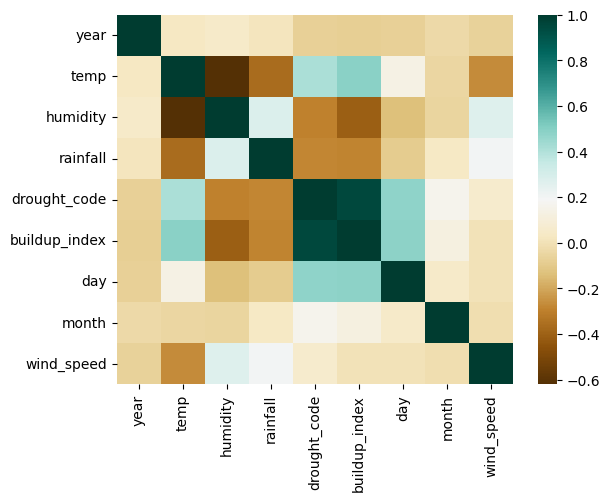

In [8]:
# understanding a bit more of data based on the correlation
# Code written by Ashwin Ram Kumar

sns.heatmap(pd.concat([X,Y], axis=1).corr(), cmap='BrBG')

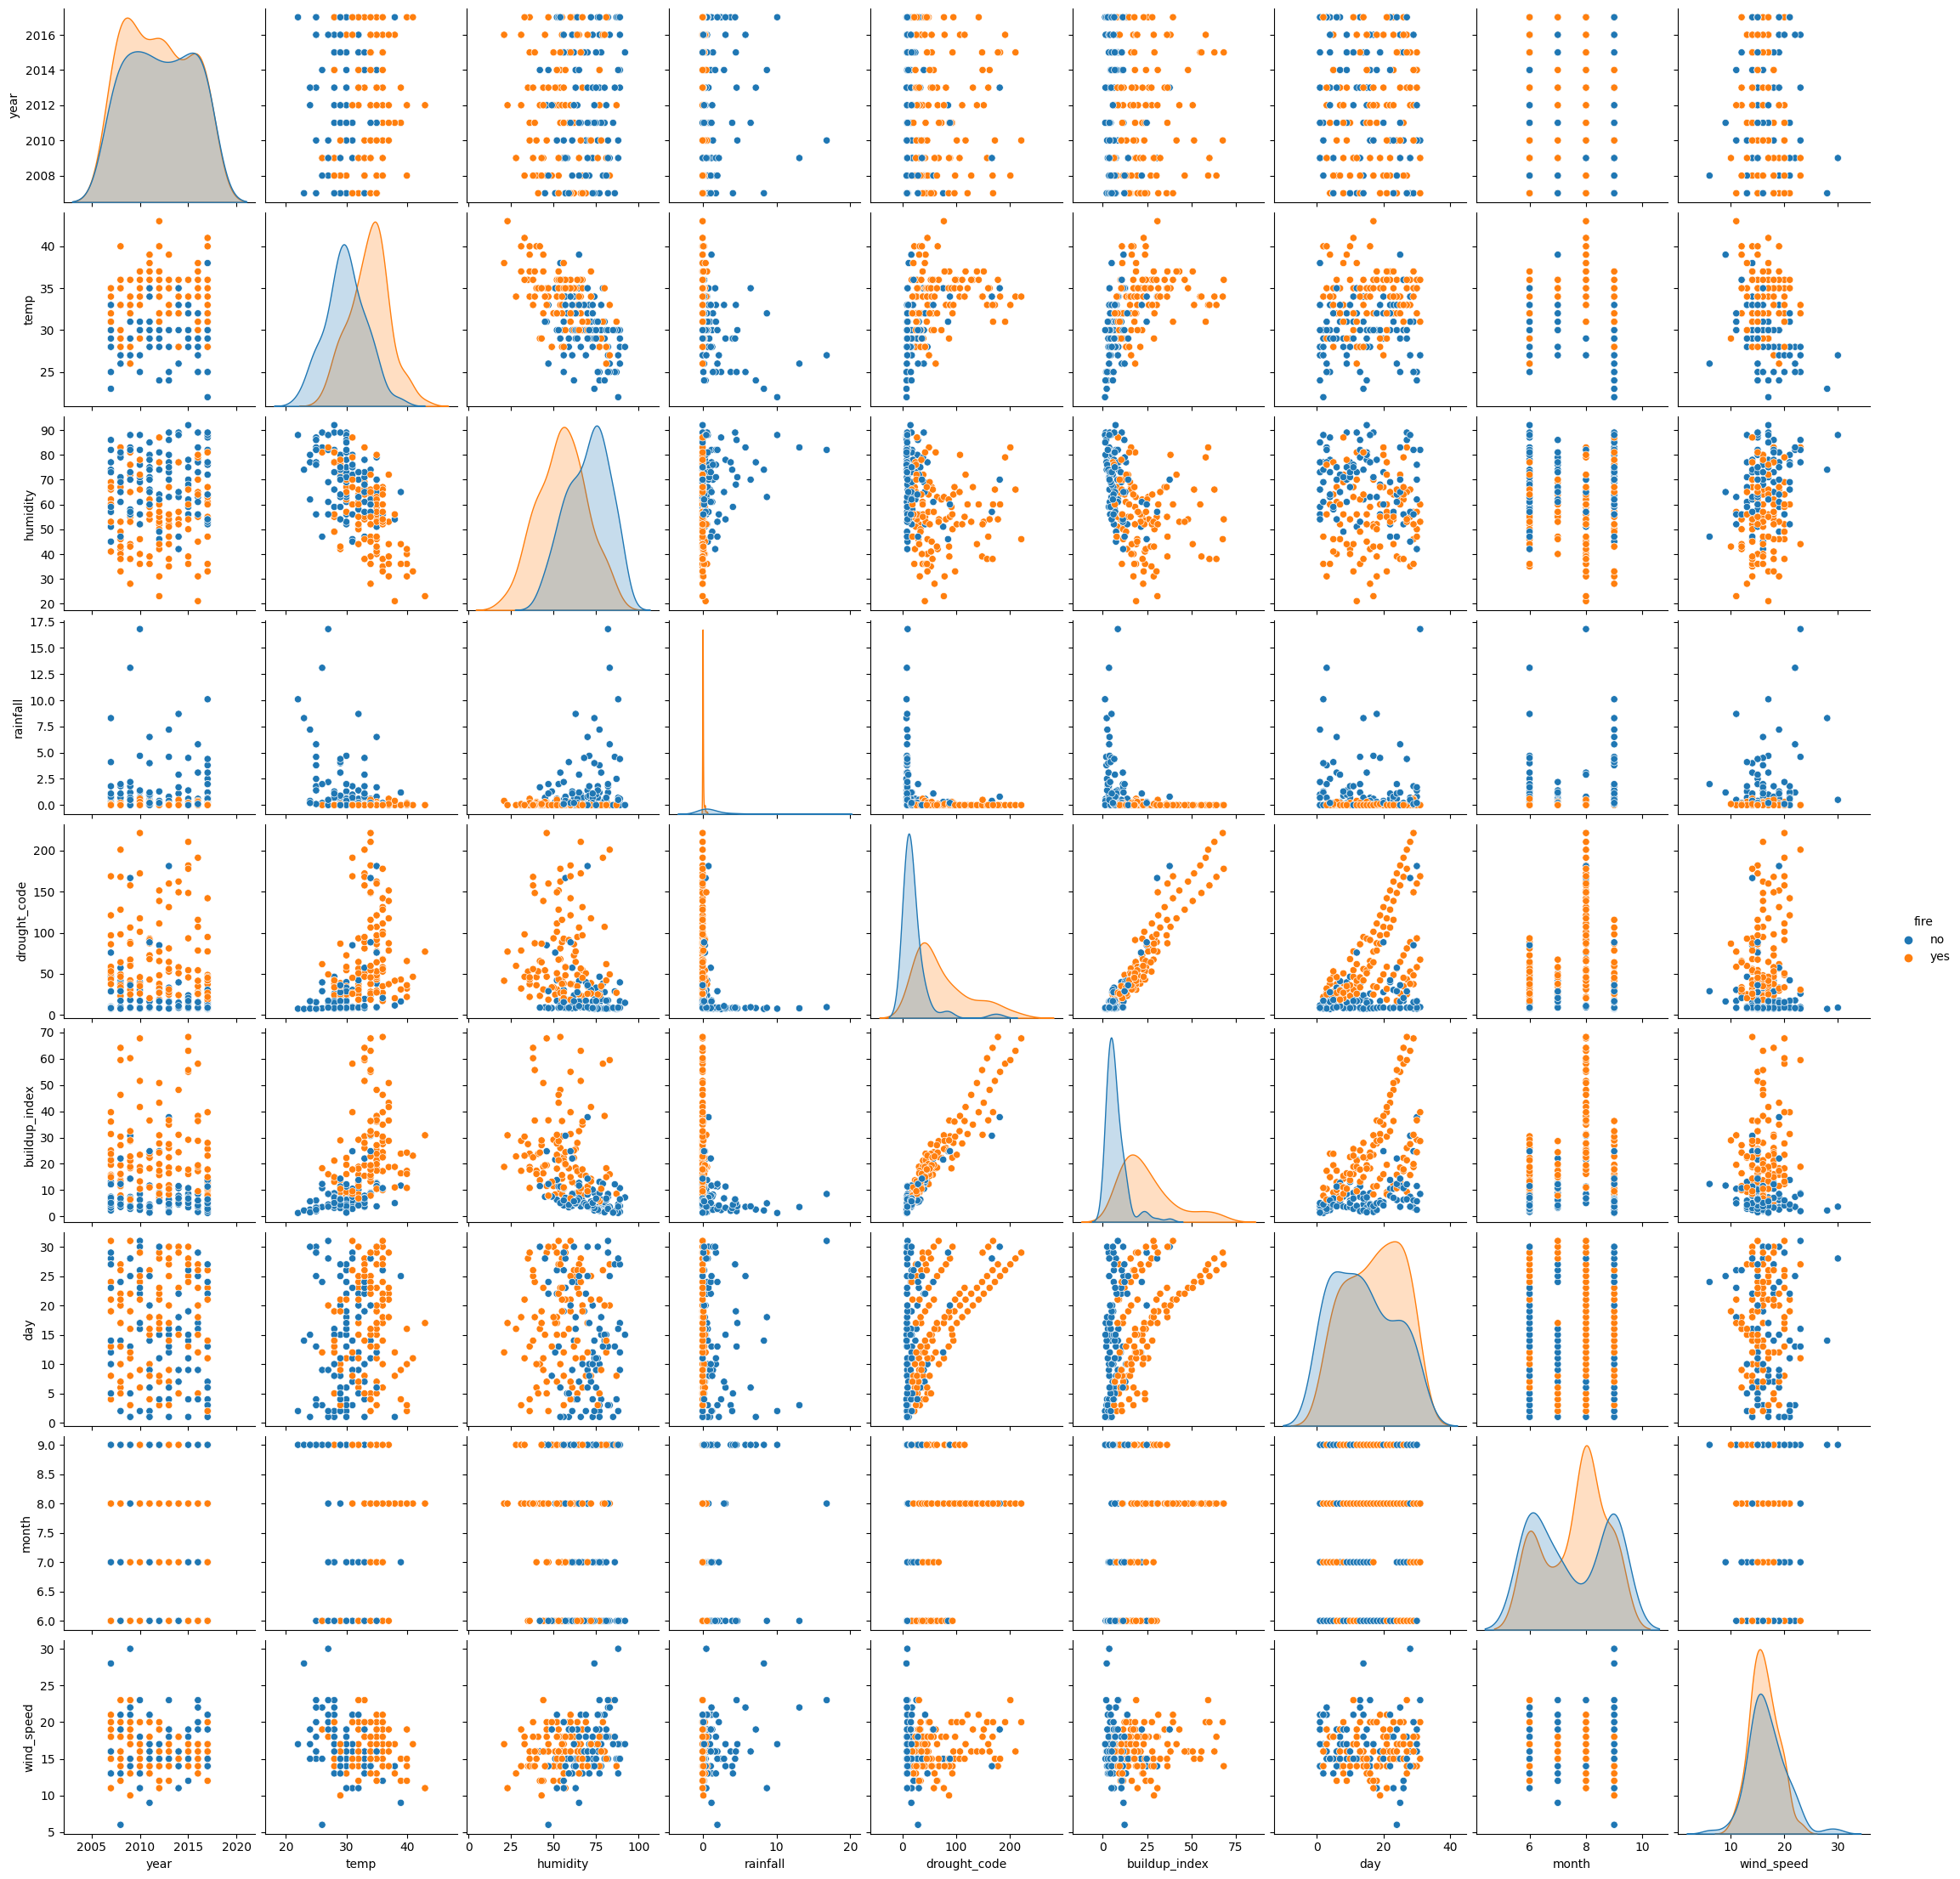

In [9]:
# Exploratory data analysis
# Code written by Ashwin Ram Kumar

sns.pairplot(pd.concat([X,Y], axis=1), hue="fire")

In [10]:
# Code written by Ashwin Ram Kumar
# split the dataset into train (60%), validate(20%), test(20%)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)

# Code written by Ashwin Ram Kumar
# Scaling all the input feature 

minmax_obj = MinMaxScaler()

X_train = minmax_obj.fit_transform(X_train)
X_val = minmax_obj.transform(X_val)
X_test = minmax_obj.transform(X_test)

# Code written by Ashwin Ram Kumar
# Label Encoding the target variables text data

label_enc_obj = LabelEncoder()

y_train = label_enc_obj.fit_transform(y_train)
y_val = label_enc_obj.transform(y_val)
y_test = label_enc_obj.transform(y_test)

In [11]:
X_train

array([[0.1       , 0.66666667, 0.45070423, ..., 0.7       , 0.66666667,
        0.41666667],
       [0.1       , 0.61904762, 0.30985915, ..., 0.53333333, 1.        ,
        0.25      ],
       [0.9       , 0.76190476, 0.        , ..., 0.36666667, 0.66666667,
        0.45833333],
       ...,
       [0.6       , 0.47619048, 0.42253521, ..., 0.53333333, 1.        ,
        0.41666667],
       [0.        , 0.42857143, 0.33802817, ..., 0.9       , 1.        ,
        0.41666667],
       [0.1       , 0.85714286, 0.26760563, ..., 0.3       , 0.66666667,
        0.375     ]])

In [12]:
# Code written by Ashwin Ram Kumar
class perceptron:
    
    # Code written by Ashwin Ram Kumar
    # initializing all variables, take input from user regarding as to number of epochs, learning rate
    perceptron_probabilites_prediction = []
    def __init__(self, epochs=100, lr=0.05, random_state=42, activation = "sigmoid") -> None:
        
        self.perceptron_layers = []
        self.weights = []
        self.bias = []
        self.activation_func = []
        self.cost = []
        
        if activation == "sigmoid":
            self.activation = self._sigmoid
        else:
            self.activation = self._relu
        
        if epochs > 0:
            self.epochs=epochs
        else:
            raise ValueError("Epochs should be more than zero")
        
        if lr <=1 and lr >= 0:
            self.lr = lr
        else:
            raise ValueError("Learning rate should be between 0 and 1")

        if random_state != None:
            self.random_state = random_state
            np.random.seed(self.random_state)
        else:
            raise TypeError("Random State should be an integer")

        
    # Code written by Ashwin Ram Kumar
    # Adding hidden layers through a list containing number of neurons in each hidden layer ex:- [3, 7]
    def add(self, layer_list ) -> None:
        self.perceptron_layers.extend(layer_list)
        
    # Code written by Ashwin Ram Kumar
    # Part of initialization where the input and output layer number of neurons are calculated and added
    def _add_inout_layer(self, X, y ) -> None:
        self.perceptron_layers.insert(0, X.shape[1])
        if (len(np.unique(y))-1) <= 0:
            raise ValueError("Target Variable has no data")
        self.perceptron_layers.append(len(np.unique(y))-1)
        
    # Code written by Ashwin Ram Kumar
    # Part of initialization where the weights and biases are randomly initialised   
    def _initialize_weights_bias(self) -> None:
        
        for i in range(len(self.perceptron_layers)):
            
            if i == 0: 
                self.weights.append(np.random.randn(1, self.perceptron_layers[i]))
                self.bias.append(np.random.randn(self.perceptron_layers[i]))
            else:
                self.weights.append(np.random.randn(self.perceptron_layers[i], self.perceptron_layers[i-1]))
                self.bias.append(np.random.randn(self.perceptron_layers[i]))
    
    
    # def _relu(self, weighted_sum, derivative):
    #     if (derivative == True): 
    #         return np.heaviside(weighted_sum, 1)
        
    #     return np.max(weighted_sum, 0)
        

    # Code written by Ashwin Ram Kumar
    # Sigmoid function and with its respective derivative
    def _sigmoid(self, weighted_sum, derivative):
        if (derivative==True) : 
            return 1/(1+ np.exp(-weighted_sum))*(1-1/(1+ np.exp(-weighted_sum)))
        
        return 1/(1+ np.exp(-weighted_sum))
        
    # Code written by Ashwin Ram Kumar
    # Feedforward calculation (W*X + B)
    def _each_neuron_fd(self, weight_arr, bias, activation_func, input_arr):
        if len(input_arr) == 1:
            input_arr = np.expand_dims(input_arr, axis=1)
        return activation_func(np.dot(weight_arr, input_arr) + bias, False)
    
    # Code written by Ashwin Ram Kumar
    # Function to return dot product
    def _dot_product(self, a, b):
        return np.dot(a, b)
    
    # Code written by Ashwin Ram Kumar
    # Function to return elementwise product
    def _elementwise_product(self, a, b):
        return a * b
    
    # Code written by Ashwin Ram Kumar
    # Function to decide if dot product should be used or elementwise product
    def _mat_product(self, a, b):
        # print("_choose_mat_product inp", a.shape, b.shape) 
        
        if len(a.shape) == 1:
            a = np.expand_dims(a, axis=0)
        
        if len(b.shape) == 1:
            b = np.expand_dims(b, axis=0)
        
        # print("_choose_mat_product", a.shape, b.shape)    
        if a.shape == b.shape:
            # print("_choose_mat_product elem", self._elementwise_product(a, b).shape)
            return self._elementwise_product(a, b)
        
        # print("_choose_mat_product dot", self._dot_product(a, b).shape)
        return self._dot_product(a, b)
            
            
    # Code written by Ashwin Ram Kumar
    # Back propagation Algorithm to calculate error in each weight, Formula explained in document
    def _back_propogation(self, each_x, each_y, weights, each_weighted_sum, each_neuron_output, activation_func):
        
        error_weight_each_layer = []
        
        
        storing_precomputed_values = None 
        
        
        for i in range(len(each_neuron_output)-1, -1, -1):
            # print("perceptron fit _back_prop loop", i, each_neuron_output[i-1].shape, activation_func(each_weighted_sum[i], True).shape, 2*(each_neuron_output[i] - each_y).shape, weights[i].shape, bias[i].shape)
            if i == 3:
                storing_precomputed_values = self._mat_product(2*(each_neuron_output[i] - each_y), activation_func(each_weighted_sum[i], True))
                error_weight_each_layer.append(self._mat_product(storing_precomputed_values, each_neuron_output[i-1]))
                
            elif i == 0:
                
                # print("perceptron fit _back_prop loop", i, storing_precomputed_values.shape, weights[i+1].shape, self._mat_product(storing_precomputed_values, weights[i+1]).shape, np.expand_dims(activation_func(each_weighted_sum[i], True), axis=0).shape, each_x.shape)
                storing_precomputed_values = self._mat_product(self._mat_product(storing_precomputed_values, weights[i+1]), activation_func(each_weighted_sum[i], True))
                error_weight_each_layer.append(self._mat_product(storing_precomputed_values, each_x))
                # print("perceptron fit _back_prop output loop", i, error_weight_each_layer[3].shape, weights[i].shape)
                
            else:
                # print("perceptron fit _back_prop loop", i, storing_precomputed_values.shape, weights[i+1].shape, self._mat_product(storing_precomputed_values, weights[i+1]).shape, np.expand_dims(activation_func(each_weighted_sum[i], True), axis=0).shape, each_neuron_output[i-1].shape)
                storing_precomputed_values = self._mat_product(self._mat_product(storing_precomputed_values, weights[i+1]), activation_func(each_weighted_sum[i], True))
                error_weight_each_layer.append(self._mat_product(storing_precomputed_values.T, each_neuron_output[i-1]))
                # print("perceptron fit _back_prop output loop", i, error_weight_each_layer[1].shape, weights[i].shape)
                
            weights[i] = weights[i] - (self.lr * error_weight_each_layer[len(each_neuron_output)-1-i])
            
        return weights
                
        
    # Code written by Ashwin Ram Kumar
    # Fit function to run the complete algorithm which is initialisation, feedforward and backpropagation over the epochs said
    def fit(self, X, Y):
        try:
            self._add_inout_layer(X, Y)
            self._initialize_weights_bias()
            
            for _ in range(self.epochs):
                for x, y in zip(X, Y):
                    each_neuron_output = []
                    each_weighted_sum = []
                    for i in range(len(self.perceptron_layers)):
                        
                        if i==0:
                            each_weighted_sum.append(self._each_neuron_fd(self.weights[i] , self.bias[i], self.activation, x ))
                            each_neuron_output.append(each_weighted_sum[i])
                        else:
                            each_weighted_sum.append(self._each_neuron_fd(self.weights[i] , self.bias[i], self.activation, each_neuron_output[i-1] ))
                            each_neuron_output.append(each_weighted_sum[i])
                    
                    self.weights = self._back_propogation(x, y, self.weights, each_weighted_sum, each_neuron_output, self.activation)
                # print("error\% in epch:", i, "is", mean_squared_error(y, each_neuron_output[len(self.perceptron_layers)-1], ), "accuracy is", accuracy_score(y, each_neuron_output[len(self.perceptron_layers)-1]))
        except:
            print("Error occured while printing")
            traceback.print_exc()
    
    # Code written by Ashwin Ram Kumar
    # Converting probabilities into classes 
    def _convert_probabilities_classes(self, predictions):
        return [ 1 if pred > 0.5 else 0 for pred in predictions ]
    
    # Code written by Ashwin Ram Kumar
    # Function to predict the class using the trained weights and biases
    def predict(self, X):
        try:
            y = []
            for x in X:
                for i in range(len(self.perceptron_layers)):
                    if i == 0:
                        output = self._each_neuron_fd(self.weights[i], self.bias[i], self.activation, x)
                    elif i == len(self.perceptron_layers) -1:
                        y.append(self._each_neuron_fd(self.weights[i], self.bias[i], self.activation, output)[0])
                    else:
                        output = self._each_neuron_fd(self.weights[i], self.bias[i], self.activation, output)
        
            perceptron_probabilites_prediction = y    
            
            return self._convert_probabilities_classes(y)
            # return y
        except:
            print("Error occured while predicting")
            traceback.print_exc()

In [13]:
# Code written by Ashwin Ram Kumar
# building the model with parameters, adding layers and fitting - MLP

model = perceptron( epochs=550, lr=0.02, random_state=42)
model.add([8, 8])
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [14]:
# Code written by Ashwin Ram Kumar
# Checking the accuracy, precision, recall, f1score - MLP

prediction_change = [ 1 if pred > 0.5 else 0 for pred in predictions ]
metric_list = [
    ["ANN", accuracy_score(y_test, prediction_change), precision_score(y_test, prediction_change), recall_score(y_test, prediction_change), f1_score(y_test, prediction_change)],
]
metric_list

[['ANN',
  0.8536585365853658,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334]]

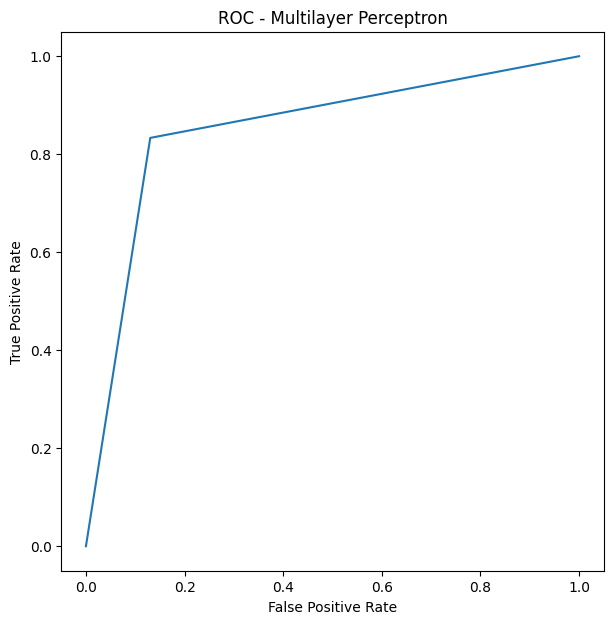

In [15]:
# Code written by Ashwin Ram Kumar
# generating roc_curve using scikit library and plotting them - MLP

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predictions)

plt.subplots(1, figsize=(7,7))
plt.title('ROC - Multilayer Perceptron')
plt.plot(false_positive_rate1, true_positive_rate1)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [16]:
# Code written by Ashwin Ram Kumar
# Refeerence algorithm implementation starting now

In [17]:
# Code written by Ashwin Ram Kumar
# building the model with parameters, adding layers and fitting - refernce MLP

clf = MLPClassifier(hidden_layer_sizes=(8,8),activation="logistic", learning_rate_init=0.02, max_iter=550, random_state=21).fit(X_train, y_train)
ref_predictions=clf.predict(X_test)
print(clf.score(X_test, y_test))

0.8536585365853658


In [18]:
# Code written by Ashwin Ram Kumar
# Checking the accuracy, precision, recall, f1score - Reference MLP

ref_prediction_change = [ 1 if pred > 0.5 else 0 for pred in ref_predictions ]
metric_list = [
    ["ANN", accuracy_score(y_test, ref_prediction_change), precision_score(y_test, ref_prediction_change), recall_score(y_test, ref_prediction_change), f1_score(y_test, ref_prediction_change)],
]
metric_list

[['ANN', 0.8536585365853658, 0.8, 0.8888888888888888, 0.8421052631578948]]

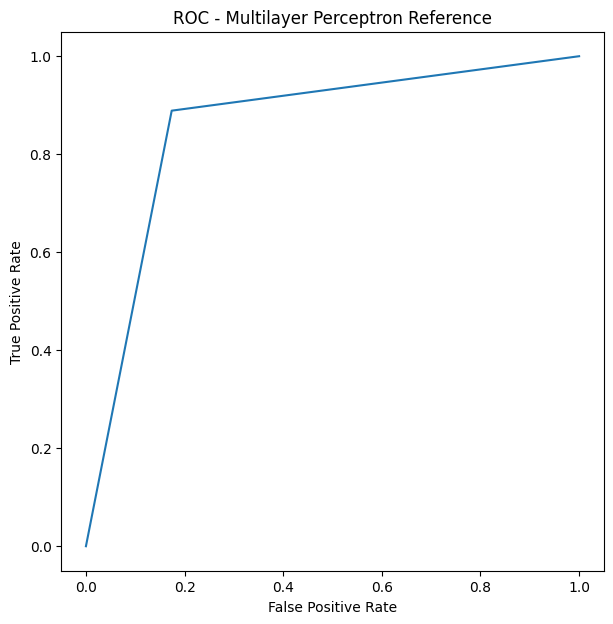

In [19]:
# Code written by Ashwin Ram Kumar
# generating roc_curve using scikit library and plotting them - reference MLP

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, ref_predictions)

plt.subplots(1, figsize=(7,7))
plt.title('ROC - Multilayer Perceptron Reference')
plt.plot(false_positive_rate, true_positive_rate)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [20]:
roc_auc_score(y_test, ref_predictions)

0.857487922705314

c:\Users\Ashwin RK\.conda\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ashwin RK\.conda\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ashwin RK\.conda\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ashwin RK\.conda\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  war

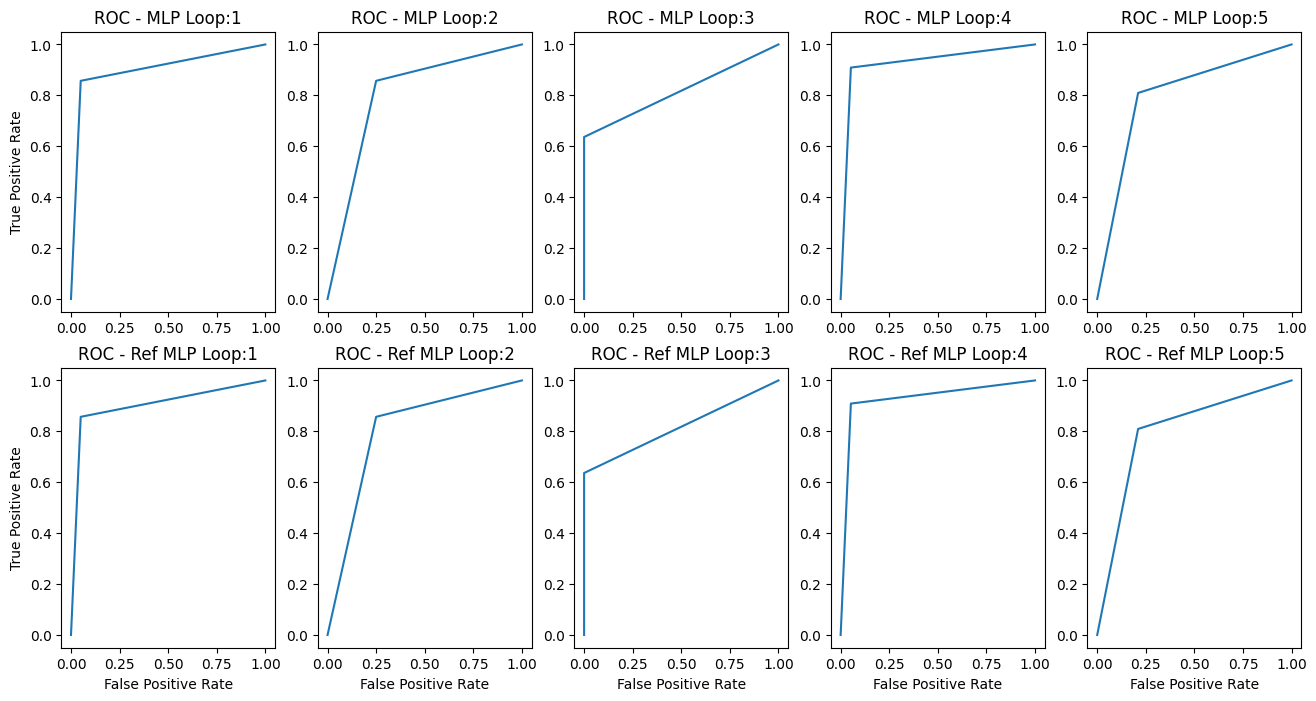

In [21]:
# Code written by Ashwin Ram Kumar
# KFold implementation with tabulation of data and nested ROC curve

kfold = StratifiedKFold(n_splits=5).split(X, Y)
scores = []

tabulate_result = {"Loop no": [], "Accuracy_MLP": [], "Accuracy_Ref_MLP": [], "F1-Score_MLP": [], "F1-Score_Ref_MLP": [], "Recall Score_MLP":[], "Recall Score_Ref_MLP":[], "AUC ROC_MLP": [],    "AUC ROC_Ref_MLP": [] }

if type(X) == pd.DataFrame: 
    X = X.to_numpy()
    Y = Y.to_numpy()
    
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(16,8))

for k, (train_index, test_index) in enumerate(StratifiedKFold(n_splits=5).split(X, Y)):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]
    
    minmax_obj = MinMaxScaler()

    X_train = minmax_obj.fit_transform(X_train)
    X_test = minmax_obj.transform(X_test)

    label_enc_obj = LabelEncoder()

    y_train = label_enc_obj.fit_transform(y_train)
    y_test = label_enc_obj.transform(y_test)
    
    model = perceptron( epochs=550, lr=0.02, random_state=42)
    model.add([8, 8])
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    
    prediction_change = [ 1 if pred > 0.5 else 0 for pred in predictions ]

    clf = MLPClassifier(hidden_layer_sizes=(8,8),activation="logistic", learning_rate_init=0.02, max_iter=550, random_state=42).fit(X_train, y_train)
    ref_predictions=clf.predict(X_test)
    
    ref_prediction_change = [ 1 if pred > 0.5 else 0 for pred in ref_predictions ]
    
    tabulate_result["Loop no"].append(k+1)
    
    tabulate_result["Accuracy_MLP"].append(accuracy_score(y_test, prediction_change))
    tabulate_result["F1-Score_MLP"].append(f1_score(y_test, prediction_change))
    tabulate_result["Recall Score_MLP"].append(recall_score(y_test, prediction_change))
    tabulate_result["AUC ROC_MLP"].append(roc_auc_score(y_test, prediction_change))
    
    tabulate_result["Accuracy_Ref_MLP"].append(accuracy_score(y_test, ref_prediction_change))
    tabulate_result["F1-Score_Ref_MLP"].append(f1_score(y_test, ref_prediction_change))
    tabulate_result["Recall Score_Ref_MLP"].append(recall_score(y_test, ref_prediction_change))
    tabulate_result["AUC ROC_Ref_MLP"].append(roc_auc_score(y_test, ref_predictions))
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, ref_predictions)
    false_positive_rate_ref, true_positive_rate_ref, threshold_ref = roc_curve(y_test, ref_predictions)
    
    
    plt.subplot(rows, cols, k+1) 
    plt.plot(false_positive_rate, true_positive_rate)
    plt.title('ROC - MLP Loop:'+str(k+1))
    
    # beautifying the nested graphs
    if k == 0:
        plt.ylabel('True Positive Rate')
        
    
    plt.subplot(rows, cols, k+6) 
    plt.plot(false_positive_rate_ref, true_positive_rate_ref)
    plt.title('ROC - Ref MLP Loop:'+str(k+1))
    # beautifying the nested graphs
    if k+5 == 5:
        plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


plt.show()
        

In [22]:
pd.DataFrame(tabulate_result)

,Loop no,Accuracy_MLP,Accuracy_Ref_MLP,F1-Score_MLP,F1-Score_Ref_MLP,Recall Score_MLP,Recall Score_Ref_MLP,AUC ROC_MLP,AUC ROC_Ref_MLP
0,1,0.853659,0.902439,0.842105,0.900000,0.761905,0.857143,0.855952,0.903571
1,2,0.634146,0.804878,0.666667,0.818182,0.714286,0.857143,0.632143,0.803571
2,3,0.658537,0.804878,0.562500,0.777778,0.409091,0.636364,0.678230,0.818182
3,4,0.951220,0.926829,0.956522,0.930233,1.000000,0.909091,0.947368,0.928230
4,5,0.800000,0.800000,0.809524,0.809524,0.809524,0.809524,0.799499,0.799499
